In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

In [16]:
def loadDataSet(filename):
    X=[]
    Y=[]
    with open(filename,'rb') as f:
        for idx,line in enumerate(f):
            line = line.decode('utf-8').strip()
            if not line:
                continue
            entity = line.split()
            print(entity)
            if idx==0:
                numFea=len(entity)
                
            entity=list(map(float,entity))
            
            X.append(entity[:-1])
            Y.append([entity[-1]])
    return np.array(X),np.array(Y)

In [32]:
def h(theta,X):
    return np.dot(X,theta)

In [35]:
def J(theta,X,Y):
    m=len(X)
    return np.sum(np.dot(h(theta,X)-Y,(h(theta,X)-Y).T)/(2*m))

## 梯度下降

In [36]:
def bgd(alpha,maxloop,epsilon,X,Y):
    m,n = X.shape
    theta = np.zeros((2,1))
    
    count=0
    converged=False
    error=np.inf  #当前的代价函数值
    errors=[]
    thetas={0:[theta[0,0]],1:[theta[1,0]]}
    
    while count <= maxloop:
        if(converged):
            break;
        count+=1
        temp1=theta[0,0]-alpha/m*(h(theta,X)-Y).sum()
        temp2=theta[1,0]-alpha/m*(np.dot(X[:,1][:,np.newaxis].T,(h(theta,X)-Y))).sum()
        
        #同步更新
        theta[0,0]=temp1
        theta[1,0]=temp2
        thetas[0].append(temp1)
        thetas[1].append(temp2)
        
        error=J(theta,X,Y)
        errors.append(error)
        
        if(error < epsilon):
            converged = True
    
    return theta,errors,thetas    

In [53]:
X,Y=loadDataSet('./data/ex1.txt')
print(X.shape)
print(Y.shape)

['1.006', '6.106']
['1.005', '6.105']
['1.004', '6.104']
['2.016', '12.116']
['2.115', '12.115']
['2.014', '12.114']
['3.016', '18.216']
['3.015', '19.215']
['3.014', '18.214']
['6.016', '36.316']
['6.115', '36.315']
['6.014', '36.314']
(12, 1)
(12, 1)


In [54]:
m,n=X.shape
X=np.concatenate((np.ones((m,1)),X),axis=1)
X.shape

(12, 2)

In [79]:
alpha=0.01 #学习率
maxloop=1500 #最大迭代次数
epsilon=0.01 #收敛判断条件

result = bgd(alpha,maxloop,epsilon,X,Y)
theta,errors,thetas = result

In [80]:
xCopy=X.copy()
xCopy.sort(0)
yHat=h(theta,xCopy)#预测值

In [81]:
print(xCopy[:,1].shape)
print(yHat.shape)
print(theta.shape)
print(theta)

(12,)
(12, 1)
(2, 1)
[[ 1.26638665]
 [ 5.61122991]]


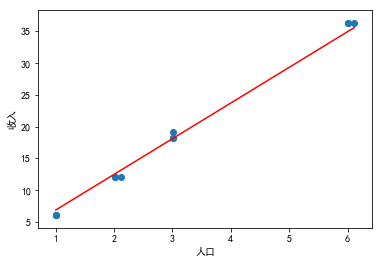

In [82]:
#绘制回归直线
plt.xlabel(u'人口')
plt.ylabel(u'收入')
plt.plot(xCopy[:,1],yHat,color='r')
plt.scatter(X[:,1].flatten(),Y.T.flatten())
plt.show()

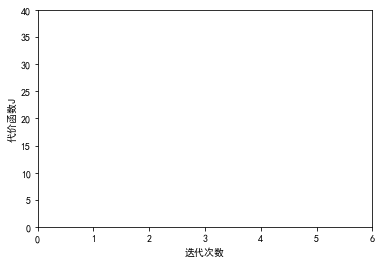

In [83]:
#绘制代价曲线
plt.xlim(0,6)
plt.ylim(0,40)
plt.xlabel(u'迭代次数')
plt.ylabel(u'代价函数J')
plt.plot(range(len(errors)),errors)
plt.show()

In [2]:
def bgdm(alpha,maxloop,epsilon,X,Y):
    m,n = X.shape # m是样本数, n是特征数，也就是参数theta个数
    theta = np.zeros((n,1))
    
    count=0
    converged=False
    error=np.inf  #当前的代价函数值
    errors=[J(theta,X,Y),]
    
    thetas={}
    for i in range(n):
        thetas[i]=[theta[i,0],]#记录每一个theta j的历史更新
    
    
    while count <= maxloop:
        if(converged):
            break;
        count += 1
        
        #这里，我们的梯度计算统一了
        for j in range(n):
            deriv = np.dot(X[:,j].T,(h(theta,X)-Y)).sum() / m
            thetas[j].append(theta[j,0]-alpha*deriv) #同步更新theta，先放入thetas，下面同步更新
        
        #同步更新
        for j in range(n):
            theta[j,0] = thetas[j][-1]
        
        error = J(theta,X,Y)
        errors.append(error)  
               
        if(abs(errors[-1] - errors[-2]) < epsilon):
            converged = True
    
    return theta,errors,thetas    

In [3]:
def standarize(X):
    """特征标准化处理
    
    Args:
        X 样本集
    Returns:
        标准后的样本集
    """
    m,n = X.shape
    #归一化每一个特征
    for j in range(n):
        features = X[:,j]
        meanVal = features.mean(axis=0)
        std = features.std(axis=0)
        if std !=0:
            X[:,j] = (features-meanVal)/std
        else:
            X[:,j] = 0
    return X

In [ ]:
ori_X,Y=loadDa